In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('water.csv')

In [4]:
data.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [16]:
len(data)

61

## Задача 1

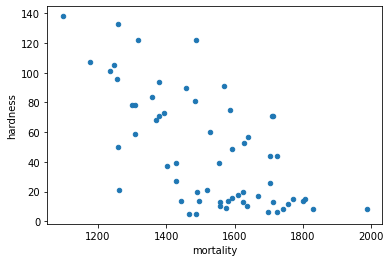

In [6]:
## строим точечный график
data.plot(kind='scatter', x='mortality', y='hardness')

In [14]:
## считаем коэффициенты корреляции Пирсона и Спирмена
r_pearson = data[['hardness', 'mortality']].corr()
r_spearman = data[['hardness', 'mortality']].corr(method = 'spearman')
print(r_spearman, r_pearson)

           hardness  mortality
hardness   1.000000  -0.631665
mortality -0.631665   1.000000            hardness  mortality
hardness   1.000000  -0.654849
mortality -0.654849   1.000000


In [28]:
## строим регрессию
X = data[['hardness']]
y = data['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [29]:
X_train.shape

(42, 1)

In [30]:
y_train.shape

(42,)

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
model.coef_

array([-3.13167087])

In [33]:
model.intercept_

1668.9722977277095

In [ ]:
# у нас получается регрессия вида y = -3.13x + 1669

In [34]:
# предсказываемые данные на основании выборки для тестирования построенной регрессии
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [35]:
# Считаем коэффициент детерминации
model.score(X_test, y_test)

0.5046490611017092

In [78]:
# Рассчитываем остатки 
y_residuals = y_test - y_pred

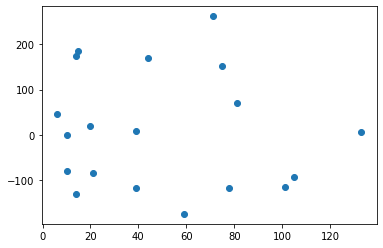

In [80]:
# Строим график остатков
plt.scatter(X_test, y_residuals)

## Задача 2

In [41]:
data_S = data[data.location == 'South']
data_N = data[data.location == 'North']

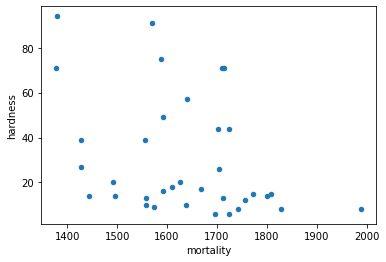

In [56]:
## строим точечный график для северных городов
data_N.plot(kind='scatter', x='mortality', y='hardness')

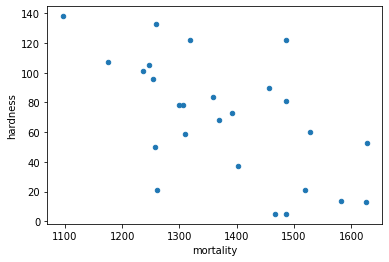

In [58]:
## строим точечный график для южных городов
data_S.plot(kind='scatter', x='mortality', y='hardness')

In [42]:
# Получили две группы с 35 и 26 наблюдениями для северных и южных городов соответственно
print(len(data_N),len(data_S) )

35 26


In [47]:
r_pearson_s = data_S[['mortality', 'hardness']].corr()
r_spearman_s =  data_S[['mortality', 'hardness']].corr(method = 'spearman')

In [48]:
r_pearson_n = data_N[['mortality', 'hardness']].corr()
r_spearman_n =  data_N[['mortality', 'hardness']].corr(method = 'spearman')

In [51]:
r_pearson_n

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [52]:
r_spearman_n

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [53]:
r_pearson_s

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [54]:
r_spearman_s

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [63]:
## строим регрессию и все остальное для южных городов
X_S = data_S[['hardness']]
y_S = data_S['mortality']

X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_S, y_S, test_size=0.30, random_state=42)

In [64]:
model.fit(X_train_S, y_train_S)

LinearRegression()

In [65]:
model.coef_

array([-3.51342921])

In [66]:
model.intercept_

1640.2204603423374

In [ ]:
# для южных городов у нас получается регрессия вида y = -3,51x + 1640

In [81]:
# предсказываемые данные на основании выборки для тестирования построенной регрессии
y_pred_S = model.predict(X_test_S)
y_pred_S

array([1446.9730333 , 1678.26591773, 1480.57969172, 1446.9730333 ,
       1615.00632541, 1646.63612157, 1571.51535569, 1678.26591773])

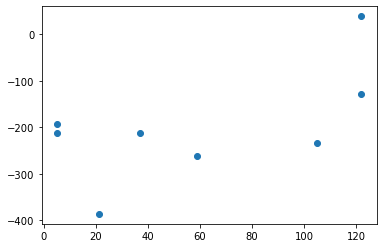

In [83]:
# Строим график остатков
y_residuals_S = y_test_S - y_pred_S
plt.scatter(X_test_S, y_residuals_S)

In [71]:
## строим регрессию и все остальное для северных городов
X_N = data_N[['hardness']]
y_N = data_N['mortality']

X_train_N, X_test_N, y_train_N, y_test_N = train_test_split(X_N, y_N, test_size=0.30, random_state=42)

In [72]:
model.fit(X_train_N, y_train_N)

LinearRegression()

In [73]:
model.coef_

array([-1.97686226])

In [74]:
model.intercept_

1688.150229031281

In [ ]:
# для северных городов у нас получаетс ярегрессия вида y = -1,98x + 1688

In [76]:
y_pred_N = model.predict(X_test_N)
y_pred_N

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

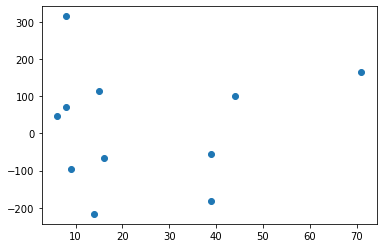

In [84]:
# Строим график остатков
y_residuals_N = y_test_N - y_pred_N
plt.scatter(X_test_N, y_residuals_N)

# Выводы 

Посчитав коэффициенты корреляции для всех городов вместе мы получили отрицательную зависимость смертности от жесткости воды, что может означать увеличение смертности при менее жесткой воде.
Коэффициенты корреляции Пирсона и Спирмена равны -0,65 и -0,63 соответственно, что говорит о значительной, но не сильной корреляции показателей.
Также мы построили регрессию для этих данных, получили ее вида y = -3.13x + 1669.


Далее было проведено разделение для южных и северных городов.
Для первых коэффициенты корреляции составили -0,6, для вторых -0,4 и -0,37, что может говорить о том, что смертность в южных городах может быть более зависима от жесткости воды.
Уравнению регрессии схожы по коэффициенту b, но значительно различаются по коэффициенту a, что в свою очередь влияет на наклон нашей прямой и, соответственно, зависимость переменных.


Помимо прочего, регрессия для южных городов была построена таким образом, что остатки регрессии смещены в одну сторону графика, те большее количетсво данных могло бы значительно изменить наклон регрессии.


Также стоит отметить, что у нас в анализе использовалось достаточно мелое количество факторов, которые в свою очередь могут зависеть от друих факторов (разивитие бактерий в теплых городах, смертность зависит от бедности, антисанитарии, и множества прочих факторов, которые могут играть разную хначимость в южных и северных городах).


Помимо прочего, для становления более точного результата нам необходимо болшее количество данных для разделения на обучающую и тестирующую выборки.